In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Step 2 - Get the data

In [3]:
data_train = pd.read_csv('data/train.csv')

## Step 3 - Train-Test-Split

In [4]:
# Not necessary, train.csv is already the training dataset

## Step 4 - Explore the Data

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.shape

(891, 12)

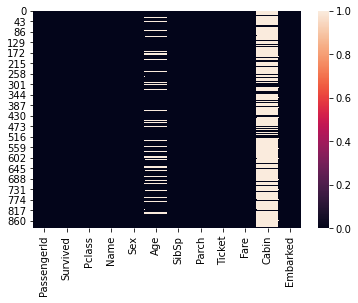

In [7]:
sns.heatmap(data_train.isna(), vmin=0, vmax=1)

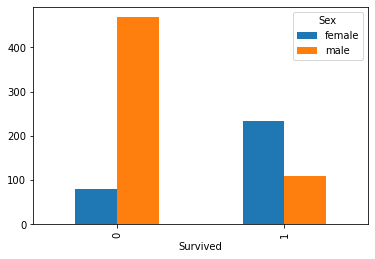

In [8]:
data_train.groupby(['Survived', 'Sex']).size().unstack(1).plot.bar()

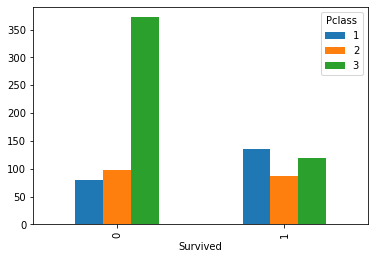

In [9]:
data_train.groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar()

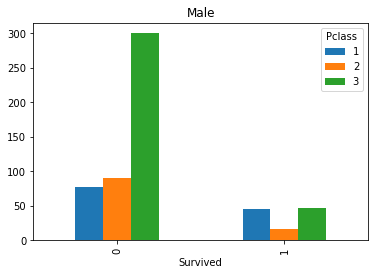

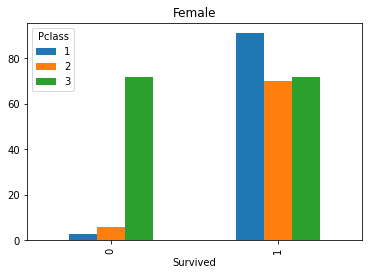

In [10]:
data_train[data_train['Sex'] == 'male'].groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar(title='Male')
data_train[data_train['Sex'] == 'female'].groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar(title='Female')

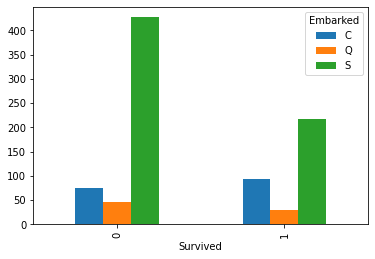

In [11]:
data_train.groupby(['Survived', 'Embarked']).size().unstack(1).plot.bar()

In [12]:
data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])

<ipython-input-12-2778ef09c60b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])


Age                  Fare           
               mean        std       mean        std
Survived                                            
0         30.626179  14.172110  22.117887  31.388207
1         28.343690  14.950952  48.395408  66.596998

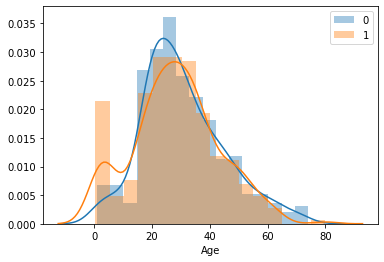

In [13]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Age'], kde=True, label=outcome,)
    
plt.legend()

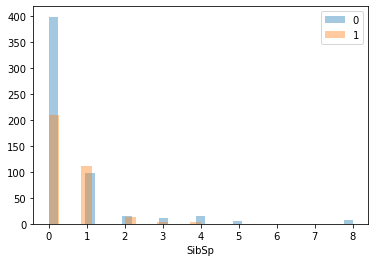

In [64]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['SibSp'], kde=False, label=outcome,)
    
plt.legend()

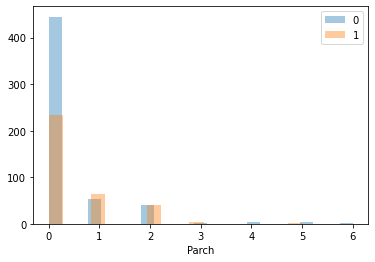

In [65]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Parch'], kde=False, label=outcome,)
    
plt.legend()

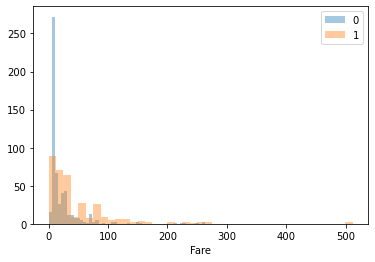

In [68]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Fare'], kde=False, label=outcome,)
    
plt.legend()

## Build Logistic Regression Model

### Logistic regression on pClass only

In [168]:
# Create model
m = LogisticRegression(random_state = 20)

In [169]:
# Define X and y of Model 
X = data_train[['Pclass']]
y = data_train['Survived']

In [170]:
# Fitting the model
m.fit(X, y)

LogisticRegression(random_state=20)

In [171]:
# Fitting parameters
w1 = m.coef_[0][0]
w0 = m.intercept_[0]
print(f'w1 = {round(w1, 2)}')
print(f'w0 = {round(w0, 2)}')

w1 = -0.84
w0 = 1.43


In [172]:
# calculate probalitity of survival based on Passenger Class for all Passengers and add it to the Dataframe
data_train['pred_prob_surv'] = m.predict_proba(X)[:,1]

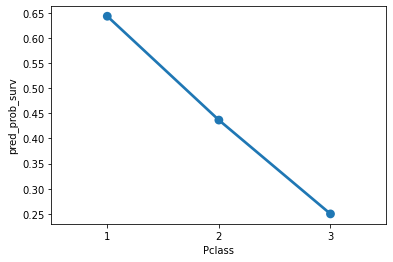

In [173]:
# Show sigmoid fit of the model
sns.pointplot(x='Pclass', y='pred_prob_surv', data=data_train)

In [174]:
print(f'The accuracy of our model is {round(m.score(X, y),2)}')
print(f'The accuracy of our model is {round(accuracy_score(y_true=y, y_pred=m.predict(X)), 2)}')

The accuracy of our model is 0.68
The accuracy of our model is 0.68


In [175]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y, X)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.637135
         Iterations 4
Pclass   -0.283407
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                 0.04321
Time:                        19:36:40   Log-Likelihood:                -567.69
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.2834      0.029     -9.610      0.000      -0.341      -0

In [176]:
def classfier_eval(y_true, y_pred):
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
    
    print(f' Accuracy (TP+TN/TP+TN+FN+FP): {round(accuracy_score(y_true, y_pred),2)}') 
    print(f' Precision (TP/TP+FP): {round(precision_score(y_true, y_pred),2)}')
    print(f' Recall (TP/TP+FN): {round(recall_score(y_true, y_pred),2)}')    
    print(f' F1-score (Precision*Recall/Precision+Recall): {round(f1_score(y_true, y_pred),2)}')   

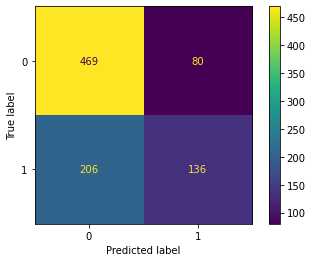

In [177]:
# Confusion matrix of the model PClass vs Survival
plot_confusion_matrix(estimator=m,
                     X=X,
                     y_true=y)

In [178]:
# Precision of Model pClass vs Survival - porportion of true positives relative to all predicted postives (TP + FP)
print(precision_score(y, m.predict(X)))
print(136 / (136 + 80))

0.6296296296296297
0.6296296296296297


In [179]:
# Sensitivity/Recall of Model pClass vs Survival - proportion of true positives to all observed postives (TP + FN)
print(recall_score(y, m.predict(X)))
print(136/(136+206))

0.39766081871345027
0.39766081871345027


In [180]:
classfier_eval(y, m.predict(X))

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49


###  Logistic regression on pClass and Sex

In [181]:
# Create model
m1 = LogisticRegression(random_state = 20)

In [182]:
def convert_sex(series):
    if series == 'male':
        return 0
    elif series == 'female':
        return 1
    else:
        raise exception
        

In [183]:
data_train['Sex_binomial'] = data_train['Sex'].apply(convert_sex)

In [184]:
# Define X and y of Model 
X1 = data_train[['Pclass', 'Sex_binomial']] # Male = 0 , Female = 1
y1 = data_train['Survived']

In [185]:
# Fitting the model
m1.fit(X1, y1)

LogisticRegression(random_state=20)

In [186]:
# Fitting parameters
w2 = m1.coef_[0][1]
w1 = m1.coef_[0][0]
w0 = m1.intercept_[0]
print(f'w2 = {round(w2, 2)}')
print(f'w1 = {round(w1, 2)}')
print(f'w0 = {round(w0, 2)}')

w2 = 2.55
w1 = -0.94
w0 = 0.64


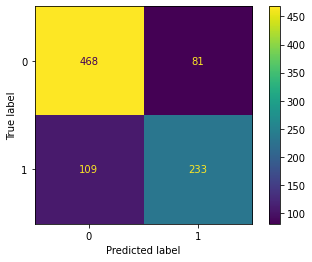

In [187]:
# Confusion matrix of the model PClass, Sex vs Survival
plot_confusion_matrix(estimator=m1,
                     X=X1,
                     y_true=y1)

In [188]:
classfier_eval(y1, m1.predict(X1))

 Accuracy (TP+TN/TP+TN+FN+FP): 0.79
 Precision (TP/TP+FP): 0.74
 Recall (TP/TP+FN): 0.68
 F1-score (Precision*Recall/Precision+Recall): 0.71


###  Logistic regression on pClass and Sex and sibSp

In [204]:
# Create model
m2 = LogisticRegression(random_state = 20)

In [205]:
# Define X and y of Model 
X2 = data_train[['Pclass', 'Sex_binomial', 'SibSp']] 
y2 = data_train['Survived']

In [206]:
# Fitting the model
m2.fit(X2, y2)

LogisticRegression(random_state=20)

In [207]:
# Fitting parameters
w3 = m2.coef_[0][2]
w2 = m2.coef_[0][1]
w1 = m2.coef_[0][0]
w0 = m2.intercept_[0]
print(f'w3 = {round(w3, 2)}')
print(f'w2 = {round(w2, 2)}')
print(f'w1 = {round(w1, 2)}')
print(f'w0 = {round(w0, 2)}')

w3 = -0.24
w2 = 2.64
w1 = -0.92
w0 = 0.67


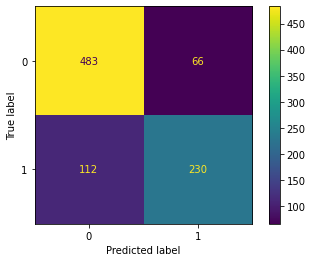

In [208]:
# Confusion matrix of the model PClass, Sex, Siblings/Spouse vs Survival
plot_confusion_matrix(estimator=m2,
                     X=X2,
                     y_true=y2)

In [209]:
classfier_eval(y2, m2.predict(X2))

 Accuracy (TP+TN/TP+TN+FN+FP): 0.8
 Precision (TP/TP+FP): 0.78
 Recall (TP/TP+FN): 0.67
 F1-score (Precision*Recall/Precision+Recall): 0.72
